In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import Data Set

In [2]:
# Import cardiac data
cardiac_data = pd.read_csv(
    "cardiacData.csv", 
    header = -1, 
    names = [ 'HR', 'Att', 'STE', 'Age', 'Outcome' ])
cardiac_data.iloc[:, [0, 1, 2, 3, 4]].values
pd.set_option('display.max_rows', 5)
pd.DataFrame(cardiac_data)

,HR,Att,STE,Age,Outcome
0,84,0,55,0,0
1,76,0,80,0,0
...,...,...,...,...,...
248,71,0,68,0,0
249,73,0,49,1,0


# Understanding Attribute Distribution

## Histograms

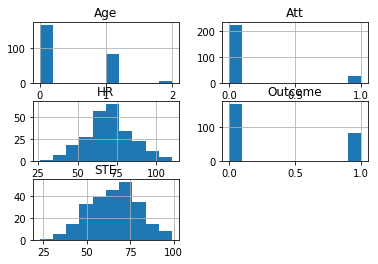

In [3]:
# Univariate Histograms
cardiac_data.hist()
plt.show()

We can see that perhaps the attributes HR and STE may have a _Gaussian distribution_. This is interesting because many machine learning techniques assume a Gaussian univariate (single variable) distribution on the input variables.

## Density Plots

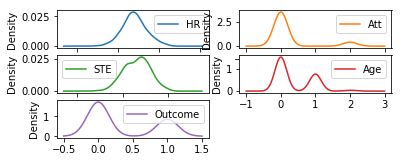

In [10]:
# Univariate Density Plots
cardiac_data.plot(kind = 'density', subplots = True, layout = (5,2), sharex = False)
plt.show()

# Find K

## Elbow Method (Sum of Squared Errors)

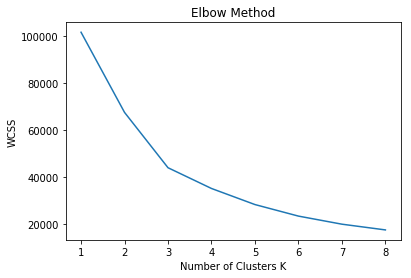

In [5]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans

wcss = []
samples = 9

for k in range(1, samples):
    kmeans = KMeans(k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(cardiac_data)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, samples), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters K')
# Average Within Cluster Distances to Centroid
# or Within Cluster Sum of Squares
plt.ylabel('WCSS')
plt.show()